In [9]:
%run load.py

kernel started successfully
loading data..
68820
8726
appending data..
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
done
['C://Users/HSS/lookbook/lookbook/data/PID000000_CLEAN1_IID000011.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000001_CLEAN1_IID000029.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000002_CLEAN1_IID000048.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000003_CLEAN1_IID000065.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000004_CLEAN1_IID000086.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000005_CLEAN1_IID000102.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000006_CLEAN1_IID000120.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000007_CLEAN1_IID000136.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000008_CLEAN1_IID000152.jpg', 'C://Users/HSS/lookbook/lookbook/data/PID000009_CLEAN1_IID000169.jpg', 'C

100/8726completed
200/8726completed
300/8726completed
400/8726completed
500/8726completed
600/8726completed
700/8726completed
800/8726completed
900/8726completed
1000/8726completed
1100/8726completed
1200/8726completed
1300/8726completed
1400/8726completed
1500/8726completed
1600/8726completed
1700/8726completed
1800/8726completed
1900/8726completed
2000/8726completed
2100/8726completed
2200/8726completed
2300/8726completed
2400/8726completed
2500/8726completed
2600/8726completed
2700/8726completed
2800/8726completed
2900/8726completed
3000/8726completed
3100/8726completed
3200/8726completed
3300/8726completed
3400/8726completed
3500/8726completed
3600/8726completed
3700/8726completed
3800/8726completed
3900/8726completed
4000/8726completed
4100/8726completed
4200/8726completed
4300/8726completed
4400/8726completed
4500/8726completed
4600/8726completed
4700/8726completed
4800/8726completed
4900/8726completed
5000/8726completed
5100/8726completed
5200/8726completed
5300/8726completed
54

In [117]:
import sklearn.preprocessing
import numpy as np
import pandas as pd
import scipy.spatial.distance
import operator
from scipy import linalg
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.gridspec as gridspec



def PIL2array(img):
    return np.array(img.getdata(),
                    np.uint8).reshape(img.size[1], img.size[0], 3)
def plot(samples):
      
    fig = plt.figure(figsize=(60,30))
    gs = gridspec.GridSpec(1,5)
    gs.update(wspace=0.05, hspace=0.05)

    for i, p in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        p = p.astype(np.uint8)
        a = plt.imshow(p)

In [86]:
sample = sample[:8726]
dataset = dataset[:8726]
print(len(sample))

8726


In [87]:
def get_closest_img(maps,PID,num):
    
    
    PID = input('write input pic_name including jpg or png :',)

    PATH = 'C://Users/HSS/lookbook/lookbook/data/'+ PID

    sam = loadImage(PATH)
    d = np.array(sam).astype(np.uint8)

    # print(type(npsam))
    print(d.shape)
    # print(npsam)
    #print(npsam.shape)
    # print(d.shape)
#     print(type(sample))
#     print(type(d))
    maps = maps.tolist()
    maps.append(np.array(d))
    
    blank = []
    for x in range(len(maps)):
        blank.append(np.array(maps[x]))
        if x % 100 == 0:
            print(x,"/",str(len(maps)))
    print('done')


    blank = np.array(blank)
    print(blank.shape)
    tmp = blank.reshape(blank.shape[0],3*64*64)
    print(tmp.shape)
    print('this will take a while, ready for the impact!')
    pca_model = PCA(n_components = 6)
    sample_array = pca_model.fit_transform(tmp)
    dataset.append(PATH)
    
    new_dict = {}
    
    for i in range(len(dataset)):
        new_dict[dataset[i]] = sample_array[i]
    print(new_dict)
    
  
    distance = {}
    standard = new_dict[PATH]
    
#     for i in range(len(new_dict)): 
#         distance[new_dict[i]] = scipy.spatial.distance.euclidean(standard, new_dict[i])
    print(len(new_dict))
    
    for i in new_dict.keys():
        distance[i] = scipy.spatial.distance.euclidean(standard, new_dict[i])
    sorted_distance = sorted(distance.items(), key = operator.itemgetter(1))
    result = sorted_distance[0:num]
   
    blank2 = []
    a=0
    print('appending started')

#     for ii in range(len(result)):
#         imgs=[Image.open(i) for i in result[ii]]
#         blank = []
#         for x in imgs:
#             blank.append(PIL2array(x))
#         blank2.append(blank)
#         a+=1
#         print(a,'/10')
    
#     result = plot(blank2)


    return result


In [88]:
print(get_closest_img(sample, 'sample2.png',5))

write input pic_name including jpg or png :sample2.png
(3, 64, 64)
0 / 8727
100 / 8727
200 / 8727
300 / 8727
400 / 8727
500 / 8727
600 / 8727
700 / 8727
800 / 8727
900 / 8727
1000 / 8727
1100 / 8727
1200 / 8727
1300 / 8727
1400 / 8727
1500 / 8727
1600 / 8727
1700 / 8727
1800 / 8727
1900 / 8727
2000 / 8727
2100 / 8727
2200 / 8727
2300 / 8727
2400 / 8727
2500 / 8727
2600 / 8727
2700 / 8727
2800 / 8727
2900 / 8727
3000 / 8727
3100 / 8727
3200 / 8727
3300 / 8727
3400 / 8727
3500 / 8727
3600 / 8727
3700 / 8727
3800 / 8727
3900 / 8727
4000 / 8727
4100 / 8727
4200 / 8727
4300 / 8727
4400 / 8727
4500 / 8727
4600 / 8727
4700 / 8727
4800 / 8727
4900 / 8727
5000 / 8727
5100 / 8727
5200 / 8727
5300 / 8727
5400 / 8727
5500 / 8727
5600 / 8727
5700 / 8727
5800 / 8727
5900 / 8727
6000 / 8727
6100 / 8727
6200 / 8727
6300 / 8727
6400 / 8727
6500 / 8727
6600 / 8727
6700 / 8727
6800 / 8727
6900 / 8727
7000 / 8727
7100 / 8727
7200 / 8727
7300 / 8727
7400 / 8727
7500 / 8727
7600 / 8727
7700 / 8727
7800 / 87

appending started
[('C://Users/HSS/lookbook/lookbook/data/sample2.png', 0.0), ('C://Users/HSS/lookbook/lookbook/data/PID008706_CLEAN1_IID077267.jpg', 7.036350323228446), ('C://Users/HSS/lookbook/lookbook/data/PID003430_CLEAN1_IID033493.jpg', 8.88265455332576), ('C://Users/HSS/lookbook/lookbook/data/PID002953_CLEAN1_IID029619.jpg', 11.407463874900335), ('C://Users/HSS/lookbook/lookbook/data/PID003233_CLEAN1_IID031937.jpg', 11.85501914222561)]
[('C://Users/HSS/lookbook/lookbook/data/sample2.png', 0.0), ('C://Users/HSS/lookbook/lookbook/data/PID008706_CLEAN1_IID077267.jpg', 7.036350323228446), ('C://Users/HSS/lookbook/lookbook/data/PID003430_CLEAN1_IID033493.jpg', 8.88265455332576), ('C://Users/HSS/lookbook/lookbook/data/PID002953_CLEAN1_IID029619.jpg', 11.407463874900335), ('C://Users/HSS/lookbook/lookbook/data/PID003233_CLEAN1_IID031937.jpg', 11.85501914222561)]


C://Users/HSS/lookbook/lookbook/data/PID008706_CLEAN1_IID077267.jpg
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=418x332 at 0x19AD25B4278>]
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=418x332 at 0x19AD25B4278>
C://Users/HSS/lookbook/lookbook/data/PID003430_CLEAN1_IID033493.jpg
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x197 at 0x19AD25B4208>]
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=216x197 at 0x19AD25B4208>
C://Users/HSS/lookbook/lookbook/data/PID002953_CLEAN1_IID029619.jpg
[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=502x459 at 0x19AD25B42B0>]
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=502x459 at 0x19AD25B42B0>


ValueError: setting an array element with a sequence.

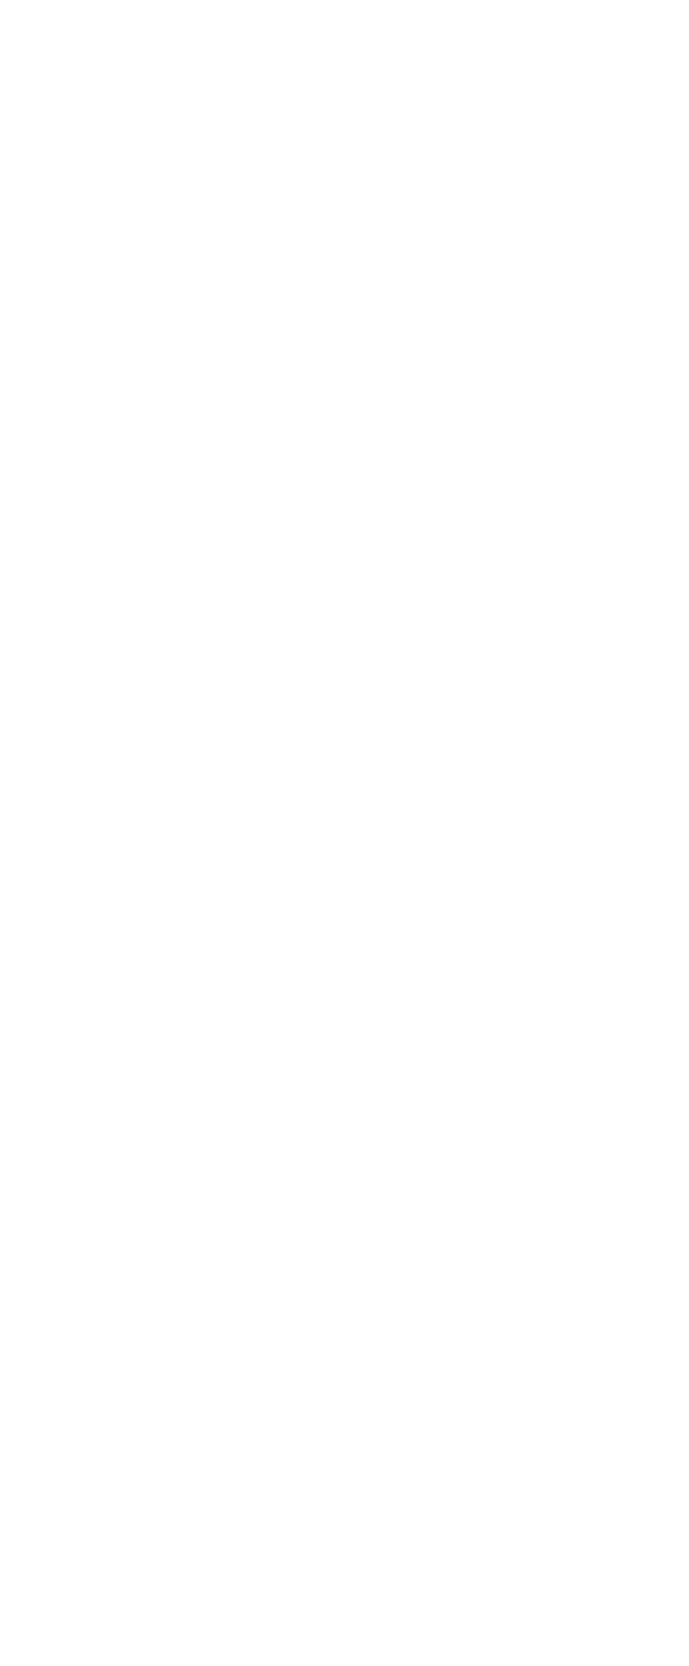